## Sign Language MNIST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [5]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [6]:
# X_train = X_train.values.reshape(-1,28,28,1)

In [7]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [8]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = y_train.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 6)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k] , cmap='gray')
            ax[i,j].set_title(str(unique_labels[y_train[k]]))
            k = k+1;
    plt.tight_layout()



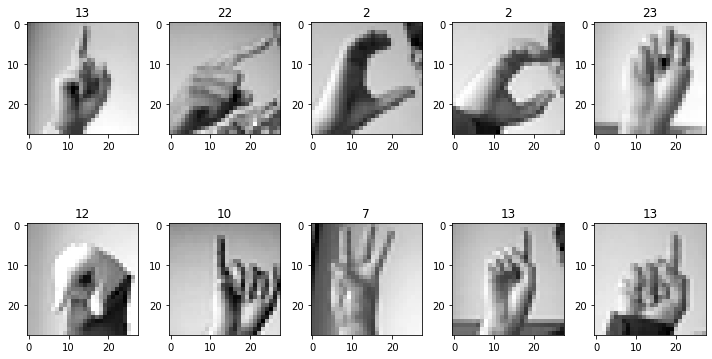

In [9]:
show_images(X_train, y_train)

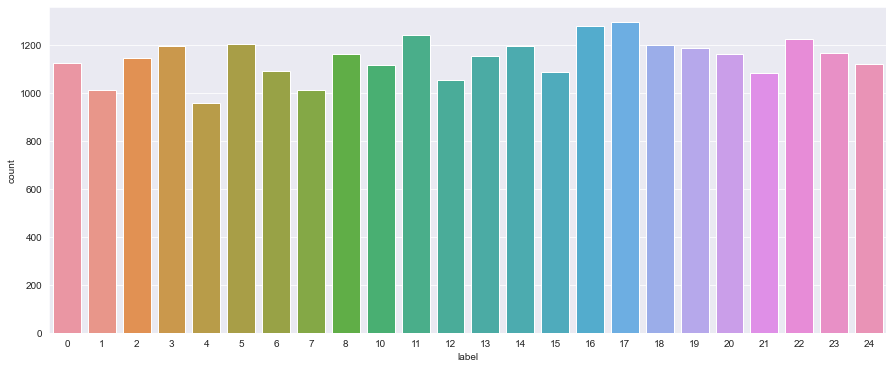

In [10]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(y_train)
plt.show()

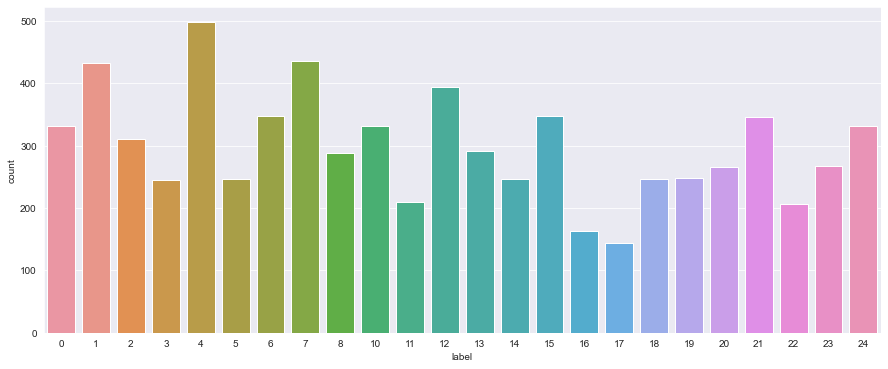

In [11]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(y_test)
plt.show()

### 1. Простые методы многоклассовой классификации

In [12]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [13]:
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
cls.score(X_train, y_train), cls.score(X_test, y_test)

(0.9999635767619741, 0.666201896263246)

In [14]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9949735931524313, 0.3931957612939208)

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

(0.9998543070478966, 0.8039598438371445)

### 2. PCA, TSNE

In [16]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE
import seaborn as sns

In [17]:
model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000)

In [ ]:
only_pca_model = decomposition.PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X_train/255)
only_pca_data = np.vstack((only_pca_data.T, y_train)).T

pca_tsne_model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000, verbose=1)
pca_tsne_data = model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y_train)).T
pca_tsne_df = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_df.head()

In [ ]:
sns.FacetGrid(pca_tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()

### 3. Нейронная сеть 

In [18]:
import torch
import torchvision

import torch.nn as nn

In [19]:
X = torch.FloatTensor(X_train.values)
y = torch.LongTensor(y_train.values) # CrossEntropyLoss требует формата int64

In [20]:
X_train.shape

(27455, 784)

In [21]:
X

tensor([[107., 118., 127.,  ..., 204., 203., 202.],
        [155., 157., 156.,  ..., 103., 135., 149.],
        [187., 188., 188.,  ..., 195., 194., 195.],
        ...,
        [174., 174., 174.,  ..., 202., 200., 200.],
        [177., 181., 184.,  ...,  64.,  87.,  93.],
        [179., 180., 180.,  ..., 205., 209., 215.]])

In [37]:
network = torch.nn.Sequential(
    torch.nn.Linear(784, 128), 
    torch.nn.Sigmoid(), 
    torch.nn.Linear(128, 64), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 25) 
)

optimizer = torch.optim.SGD(network.parameters(), lr=0.1, weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss() 

for i in range(1000):
    optimizer.zero_grad()
    pred = network(X)
#     print(pred.shape, y.shape)
    loss = criterion(pred,y.squeeze(0))
    loss.backward()
    optimizer.step()
    if i%100==0:
        print(loss.item())

3.26719069480896
3.1792752742767334
3.18180251121521
3.182823896408081
3.1831061840057373
3.1831252574920654


KeyboardInterrupt: 

In [23]:
res = torch.softmax(pred, 1)
print(res)

tensor([[0.0406, 0.0370, 0.0411,  ..., 0.0441, 0.0421, 0.0406],
        [0.0406, 0.0370, 0.0411,  ..., 0.0440, 0.0421, 0.0406],
        [0.0406, 0.0370, 0.0411,  ..., 0.0440, 0.0420, 0.0406],
        ...,
        [0.0406, 0.0370, 0.0411,  ..., 0.0440, 0.0421, 0.0406],
        [0.0406, 0.0370, 0.0411,  ..., 0.0440, 0.0421, 0.0406],
        [0.0406, 0.0370, 0.0411,  ..., 0.0440, 0.0421, 0.0406]],
       grad_fn=<SoftmaxBackward0>)


In [24]:
res[0]

tensor([0.0406, 0.0370, 0.0411, 0.0431, 0.0351, 0.0433, 0.0396, 0.0370, 0.0419,
        0.0082, 0.0404, 0.0445, 0.0384, 0.0415, 0.0429, 0.0396, 0.0457, 0.0463,
        0.0431, 0.0427, 0.0420, 0.0394, 0.0441, 0.0421, 0.0406],
       grad_fn=<SelectBackward0>)

In [25]:
res[1]

tensor([0.0406, 0.0370, 0.0411, 0.0431, 0.0351, 0.0433, 0.0396, 0.0370, 0.0419,
        0.0082, 0.0404, 0.0445, 0.0384, 0.0415, 0.0429, 0.0396, 0.0457, 0.0463,
        0.0431, 0.0427, 0.0420, 0.0394, 0.0440, 0.0421, 0.0406],
       grad_fn=<SelectBackward0>)

In [26]:
res[55]

tensor([0.0406, 0.0370, 0.0411, 0.0431, 0.0351, 0.0433, 0.0396, 0.0370, 0.0419,
        0.0082, 0.0404, 0.0445, 0.0384, 0.0415, 0.0429, 0.0396, 0.0457, 0.0463,
        0.0431, 0.0427, 0.0420, 0.0394, 0.0440, 0.0421, 0.0406],
       grad_fn=<SelectBackward0>)

In [45]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        output_1 = self.relu(self.layer_1(inputs))
        output = self.layer_2(output_1)
        
        return output

In [57]:
model = NeuralNet(28*28, 500, 25)
print(model)

NeuralNet(
  (layer_1): Linear(in_features=784, out_features=500, bias=True)
  (layer_2): Linear(in_features=500, out_features=25, bias=True)
  (relu): ReLU()
)


In [58]:
X = X.reshape(-1, 28*28)

In [59]:
y =  y.reshape(-1, 784)

RuntimeError: shape '[-1, 784]' is invalid for input of size 27455

In [60]:
y.shape

torch.Size([27455])

In [75]:
y.unsqueeze(-1).shape

torch.Size([27455, 1])

In [83]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [87]:
torch.manual_seed(0)

for i in range(1000):
    pred = model(X)
    loss = criterion(pred, y)
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
   
    
    if (i+1) % 100 == 0:
         print (i, loss.item())
            
    

99 3.190119981765747
199 3.1834802627563477
299 3.180635452270508
399 3.179135799407959
499 3.1782305240631104
599 3.177633762359619
699 3.177215337753296
799 3.1769096851348877
899 3.1766786575317383
999 3.176499366760254


In [88]:
with torch.no_grad():
    res = model(X)

In [89]:
res 

tensor([[0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029],
        [0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029],
        [0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029],
        ...,
        [0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029],
        [0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029],
        [0.1100, 0.0025, 0.1259,  ..., 0.1955, 0.1432, 0.1029]])